In [109]:
from naat.data import GLOBAL_LITIGATION_CASES_PATH
import pandas as pd
import numpy as np

In [2]:
global_cases_df = pd.read_csv(GLOBAL_LITIGATION_CASES_PATH)

In [3]:
global_cases_df

,Id,Title,Geography,Geography ISO,Jurisdiction,Citation Reference Number,Responses,At issue,Connected Internal Laws,Connected External Laws,Sectors,Side A,Side B,Side C,Events,Summary
0,7458,Asociación Civil por la Justicia Ambiental v. ...,Argentina,ARG,Supreme Court,NaN,Adaptation;Mitigation,Whether different governmental entities are re...,NaN,Paris Agreement|;United Nations Convention on ...,Cross Cutting Area,Asociación Civil por la Justicia Ambiental|ngo,Province of Entre Ríos and others|government,NaN,03/07/2020|Class action filed||;11/08/2020|Dec...,"In late Fall 2020, the uncontrolled burning of..."
1,7473,OAAA v. Araucaria Energy SA.,Argentina,ARG,Federal Court of Mercedes,NaN,Mitigation,Plaintiffs sought to block thermoelectric plant,NaN,Paris Agreement|;General Environmental Law No....,Energy,Organización de Ambientalistas Autoconvocados|ngo,Araucaria Energy SA|corporation,NaN,07/01/2018|Complaint filed,"In July 2018, an environmental group brought a..."
2,7482,"FOMEA v. MSU S.A., Rio Energy S.A., & General ...",Argentina,ARG,Federal Court of San Nicolás,NaN,Mitigation,Petition sought to block thermoelectric plant,NaN,Paris Agreement|;General Environmental Law No....,Energy,FOMEA|ngo,MSU S.A.|corporation;Rio Energy S.A.|corporati...,NaN,17/05/2017|Case filed,In May 2017 the environmental group FOMEA brou...
3,7483,Hahn et al. v. APR Energy S.R.L,Argentina,ARG,Federal Court of Campana,NaN,Mitigation,Plaintiffs sought to block thermoelectric plant,NaN,Paris Agreement|;Argentinian Constitution|http...,Energy,Hahn and others|individual_ngo,APR Energy S.R.L|corporation,NaN,29/11/2017|Case filed,"On November 29, 2017, a coalition of individua..."
4,7484,Hahn et al. v. Araucaria Energy Sociedad Anoni...,Argentina,ARG,Federal Court of Campana,NaN,Mitigation,Plaintiffs sought to block thermoelectric plant,NaN,Paris Agreement|;General Environmental Law No....,Energy,Hahn and others|individual_ngo,APR Energy S.R.L|corporation,NaN,20/12/2017|Case filed,"On December 20, 2017, a coalition of individua..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,7700,Humane Being v. the United Kingdom,United Kingdom,GBR,European Court of Human Rights,NaN,Mitigation,Whether factory farming violates human rights ...,NaN,European Convention on Human Rights|,Cross Cutting Area;Health,Humane Being |ngo,United Kingdom|government,NaN,26/07/2022|Filing date||,"On July 26, 2022, the NGO Humane Being filed a..."
680,7703,Greenpeace v. North Sea Transition Authority,United Kingdom,GBR,NaN,NaN,Mitigation,Whether the UK government correctly issued its...,NaN,NaN,Energy,Greenpeace|ngo,North Sea Transition Authority and Offshore Pe...,NaN,26/07/2022|Filing date||,"In July 2022, Greenpeace filed a legal challen..."
681,7737,"The Lifescape Project, et al. v. Drax Group PLC",United Kingdom,GBR,National Point of Contact for OECD Guidelines,NaN,Mitigation,Violation of OECD guidelines on environment an...,NaN,OECD guidelines for Multinational Enterprises|...,Energy;Environment,The Lifescape Project|ngo;The Partnership for ...,Drax Group PLC|corporation,NaN,21/10/2021|case filed||;27/07/2022|initial ass...,A group of NGOs collectively filed a complaint...
682,7747,New Weather Institute v. FIFA,United Kingdom,GBR,Advertising Standards Authority (ASA),NaN,Mitigation,"Whether FIFA's campaign on a ""carbon neutral"" ...",NaN,NaN,Environment,New Weather Institute|ngo,FIFA|ngo,NaN,01/11/2022|filed||,This case concerned FIFA's promotion of the 20...


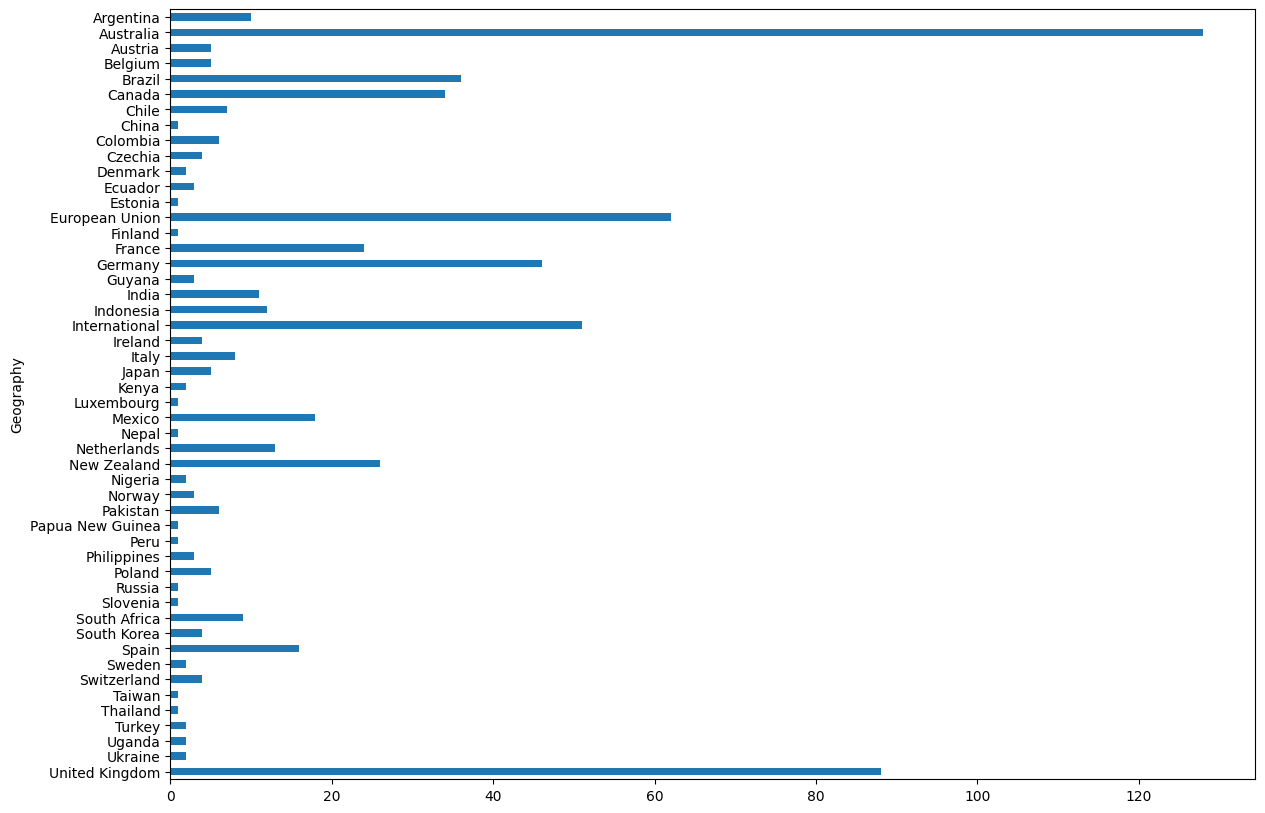

In [20]:
ax = global_cases_df.groupby(by="Geography")["Id"].count().sort_index(ascending=False).plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Jurisdiction'>

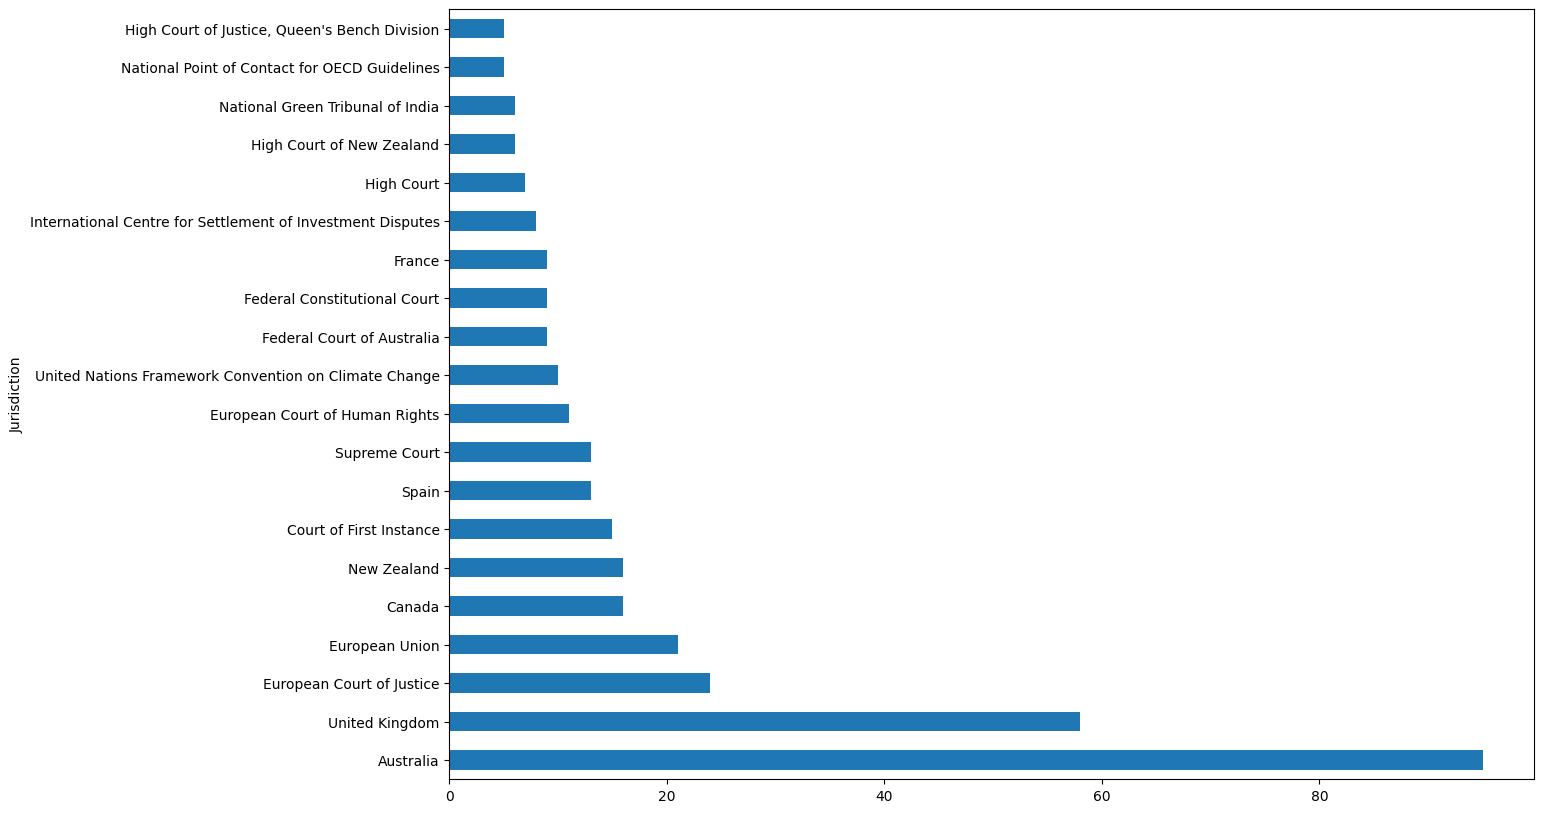

In [49]:
global_cases_df.groupby(by="Jurisdiction")["Id"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='External Laws'>

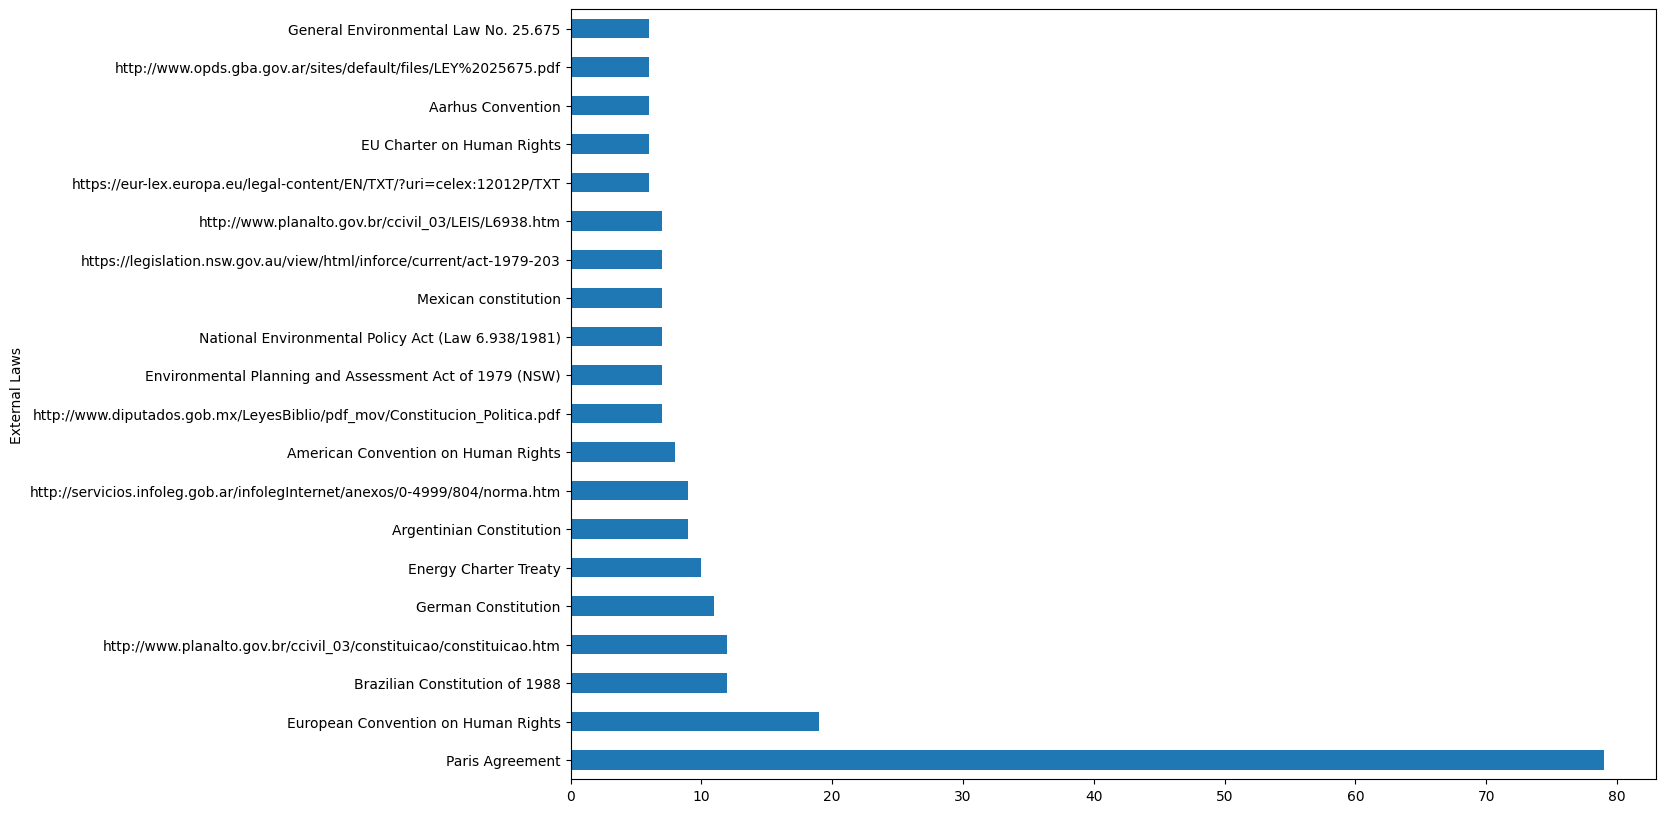

In [267]:
notna_field = global_cases_df["Connected External Laws"].notna()
external_laws = global_cases_df["Connected External Laws"][notna_field].str.split(pat=r"\|;(?!$)|\|(?!$)|;(?!$)", regex=True).to_list()
external_laws_df = pd.DataFrame(sum(external_laws, []), columns=["External Laws"]).reset_index(drop=False)
external_laws_df["External Laws"] = external_laws_df["External Laws"].str.replace("|", "", regex=False).str.strip()
external_laws_df.groupby("External Laws")["index"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Sectors'>

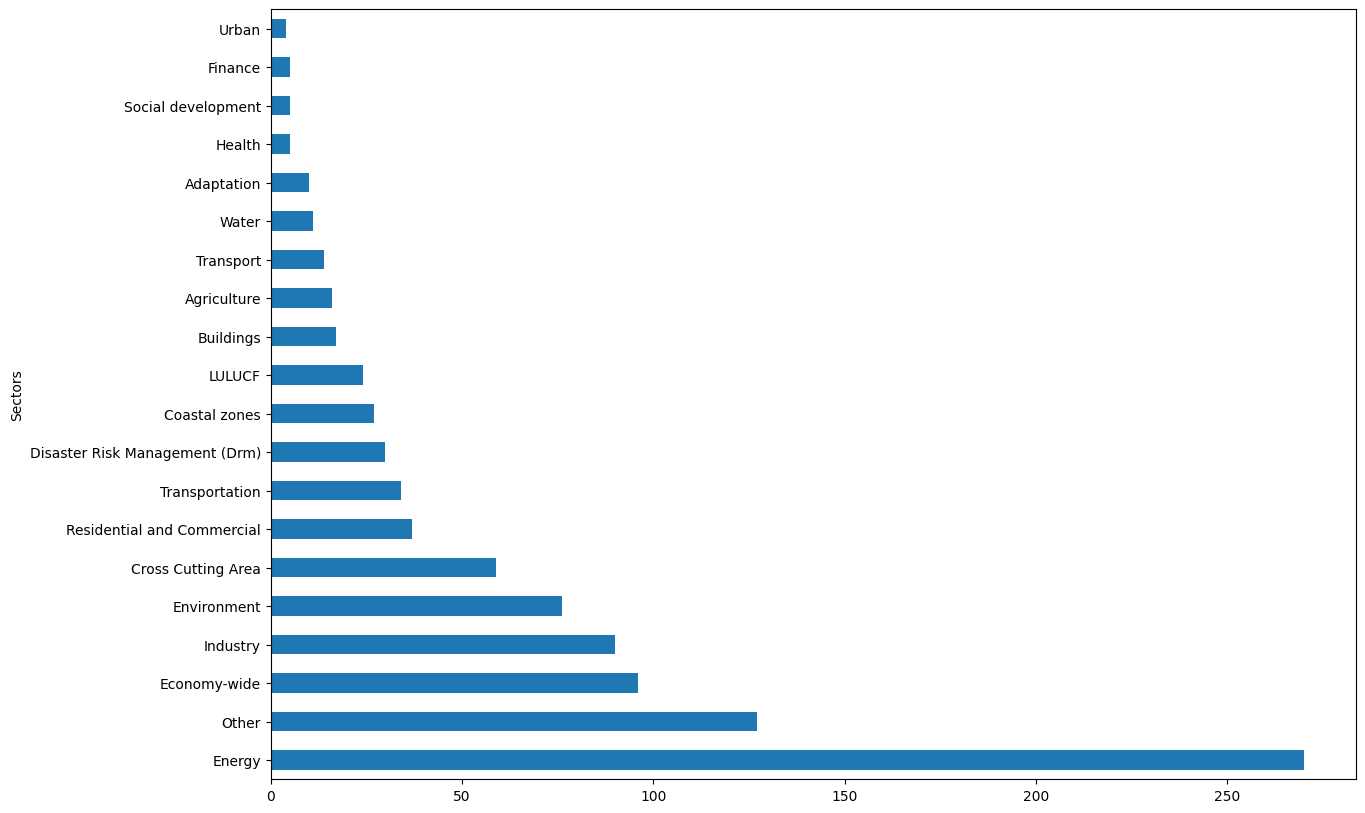

In [223]:
notna_field = global_cases_df["Sectors"].notna()
sectors = global_cases_df["Sectors"][notna_field].str.split(pat=r";(?!$)", regex=True).to_list()
sectors_df = pd.DataFrame(sum(sectors, []), columns=["Sectors"]).reset_index(drop=False)
sectors_df["Sectors"] = sectors_df["Sectors"].str.strip()
sectors_df.groupby("Sectors")["index"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

In [224]:
print(sectors_df.groupby("Sectors")["index"].count().sort_values(ascending=False).to_markdown())

| Sectors                        |   index |
|:-------------------------------|--------:|
| Energy                         |     270 |
| Other                          |     127 |
| Economy-wide                   |      96 |
| Industry                       |      90 |
| Environment                    |      76 |
| Cross Cutting Area             |      59 |
| Residential and Commercial     |      37 |
| Transportation                 |      34 |
| Disaster Risk Management (Drm) |      30 |
| Coastal zones                  |      27 |
| LULUCF                         |      24 |
| Buildings                      |      17 |
| Agriculture                    |      16 |
| Transport                      |      14 |
| Water                          |      11 |
| Adaptation                     |      10 |
| Health                         |       5 |
| Social development             |       5 |
| Finance                        |       5 |
| Urban                          |       4 |
| Public S

<Axes: ylabel='Responses'>

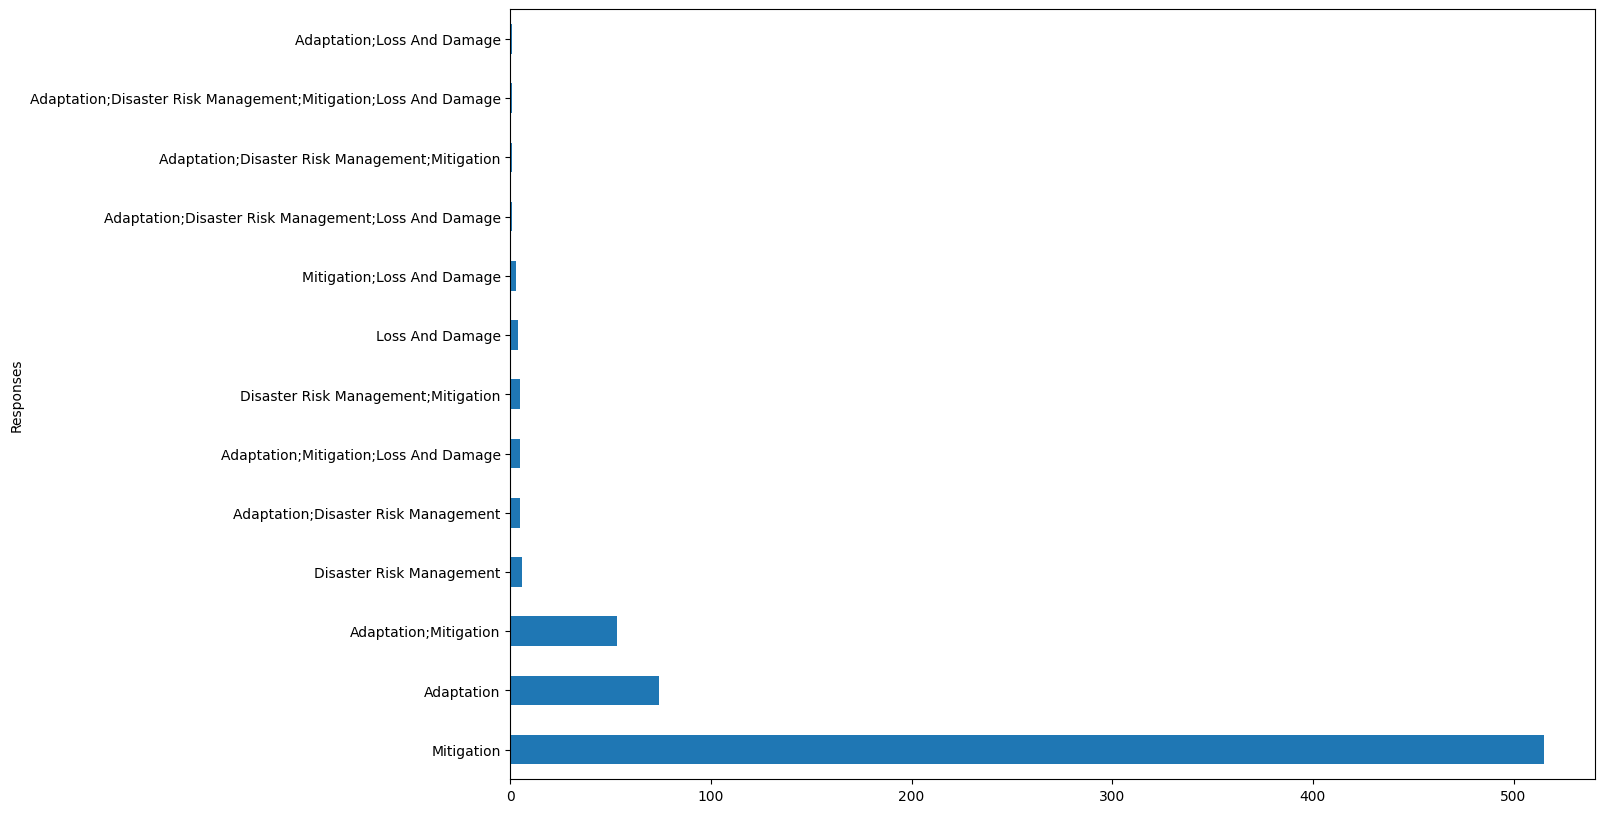

In [231]:
notna_field = global_cases_df["Responses"].notna()
global_cases_df[notna_field].groupby(by="Responses")["Id"].count().sort_values(ascending=False)[:20].plot(figsize=(14, 10), kind="barh")

<Axes: ylabel='Connected Internal Laws'>

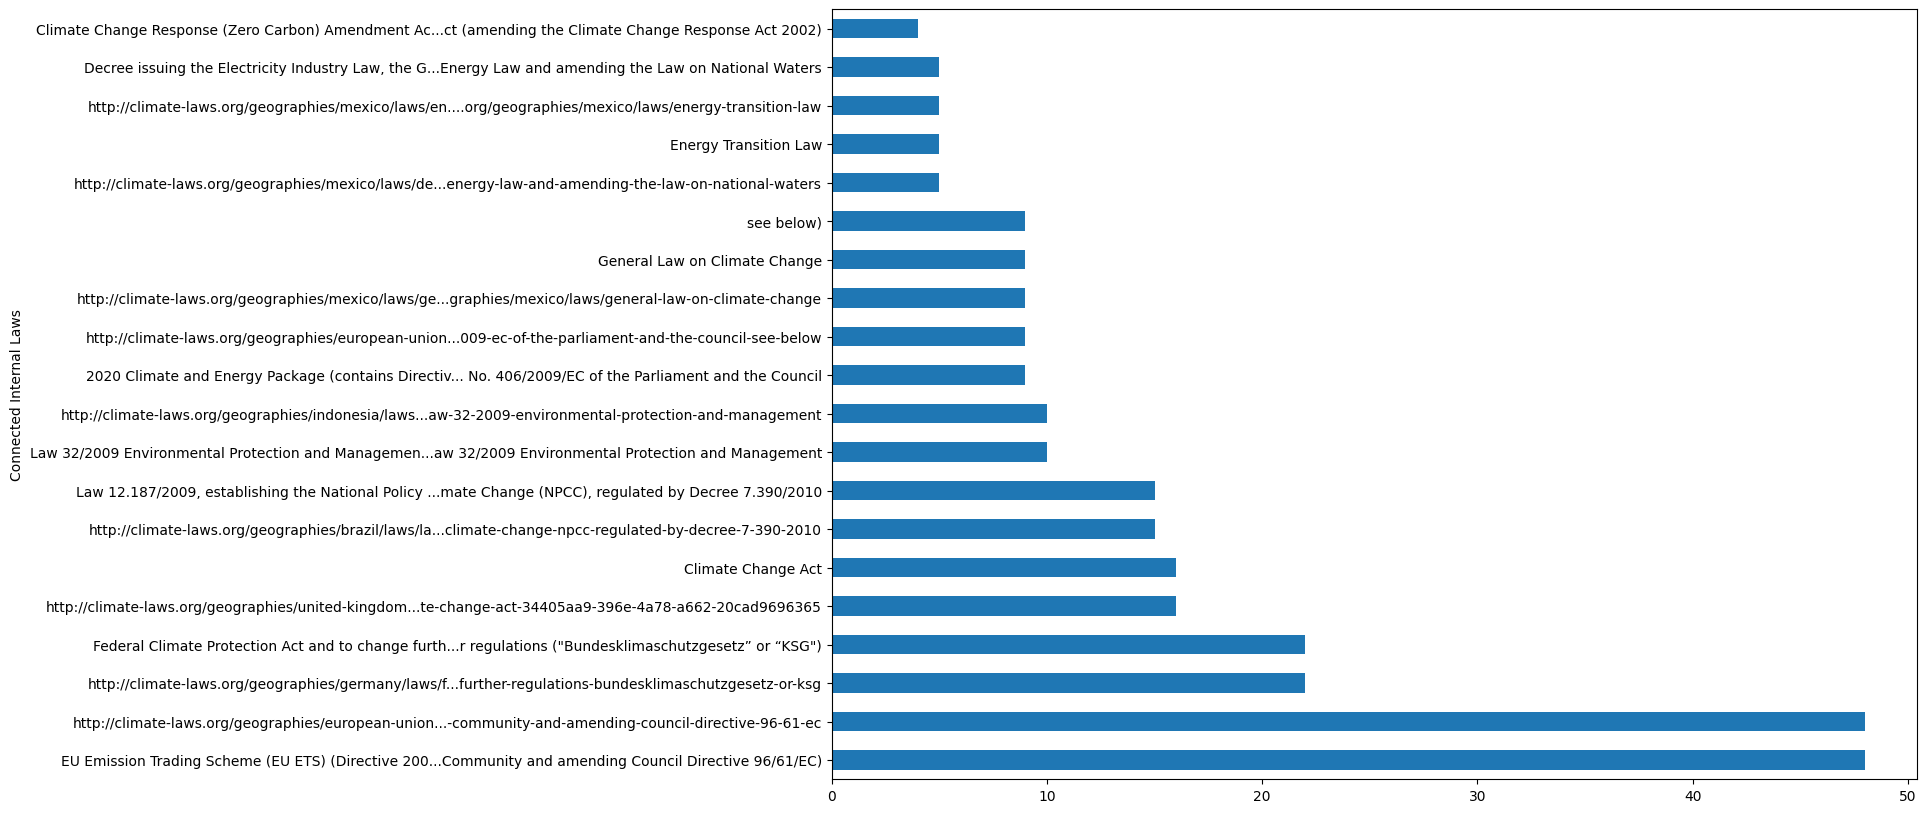

In [291]:
notna_field = global_cases_df["Connected Internal Laws"].notna()
internal_laws = global_cases_df["Connected Internal Laws"][notna_field].str.split(pat=r"\|(?!$)|;(?!$)", regex=True).to_list()
internal_laws_df = pd.DataFrame(sum(internal_laws, []), columns=["Connected Internal Laws"]).reset_index(drop=False)
internal_laws_df["Connected Internal Laws"] = internal_laws_df["Connected Internal Laws"].str.strip()
internal_laws_df["Connected Internal Laws"] = internal_laws_df["Connected Internal Laws"].apply(lambda x: x[:50] + ("..." + x[-50:] if len(x) > 50 else ""))
internal_laws_df = internal_laws_df.groupby("Connected Internal Laws")["index"].count().sort_values(ascending=False)

internal_laws_df[:20].plot(figsize=(14, 10), kind="barh")